# Import Packages

In [39]:
import os
import pickle as pkl
import sys
sys.path.append('/Users/kana/Library/Mobile Documents/com~apple~CloudDocs/Codes/GWOT_colorprefrencequalia')
import numpy as np
import pandas as pd
import sklearn
import csv
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS
import seaborn as sns
import ot
import plotly.graph_objs as go
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utilityFunctions import show_heatmaps

# Define variables (used across the code)

In [40]:
# Define unique colors
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

### configuration
n_eps = 15 # number of epsilon values tried
eps_range = [0.04, 5] # the range of epsilon searched
epsilons = np.logspace(np.log10(eps_range[0]), np.log10(eps_range[1]), n_eps) # epsilon values

# Load Data

In [41]:
# Create matrix
matrix_1 = np.zeros((matrix_size, matrix_size))
matrix_2 = np.zeros((matrix_size, matrix_size))

# Load the second CSV file
df_PM1 = pd.read_csv('/Users/kana/Library/Mobile Documents/com~apple~CloudDocs/Codes/GWOT_raw_data/202411_data/5a9b20c535237b0001129820_kana_colourPreferenceQualia_2024-11-14_03h40.27.980.csv')

# Filter for rows where 'response_type' is 'similarity'
df_PM1_similarity = df_PM1[df_PM1['response_type'] == 'similarity']

# Extract columns
colour1_1 = df_PM1_similarity['colour1']
colour2_1 = df_PM1_similarity['colour2']
target_preference_1 = df_PM1_similarity['response']

# Fill the matrix
for c1, c2, tp in zip(colour1_1, colour2_1, target_preference_1):
    I = colour_index[c1]
    j = colour_index[c2]
    matrix_1[j, I] = tp

# Load the second CSV file
df_PM2 = pd.read_csv('/Users/kana/Library/Mobile Documents/com~apple~CloudDocs/Codes/GWOT_raw_data/202411_data/5eb05d66438b180fe44f6929_kana_colourPreferenceQualia_2024-11-13_22h37.20.028.csv')

# Filter for rows where 'response_type' is 'similarity'
df_PM2_similarity = df_PM2[df_PM2['response_type'] == 'similarity']

# Extract columns
colour1_2 = df_PM2_similarity['colour1']
colour2_2 = df_PM2_similarity['colour2']
target_preference_2 = df_PM2_similarity['response']

# Fill the matrix
for c1, c2, tp in zip(colour1_2, colour2_2, target_preference_2):
    I = colour_index[c1]
    j = colour_index[c2]
    matrix_2[j, I] = tp

# Raw Data - asymmetric

In [43]:
show_heatmaps(0, 7, matrices=[matrix_1, matrix_2], titles=['Subject 1', 'Subject 2'], cbar_label="preference", color_labels=unique_colours)

NameError: name 'plt' is not defined

## Raw Data - List of all subject data

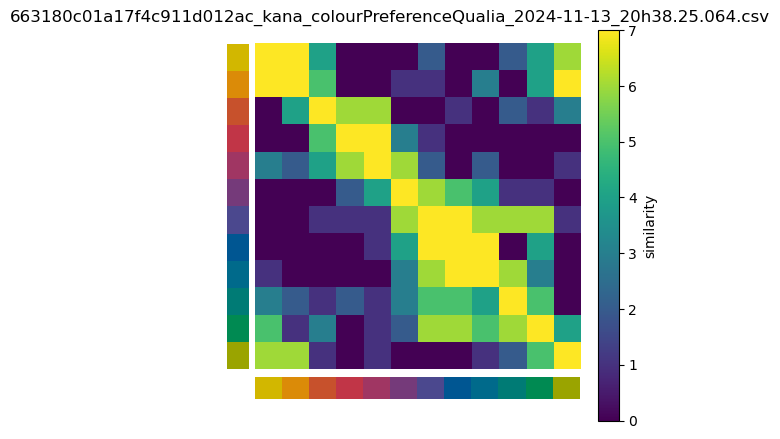

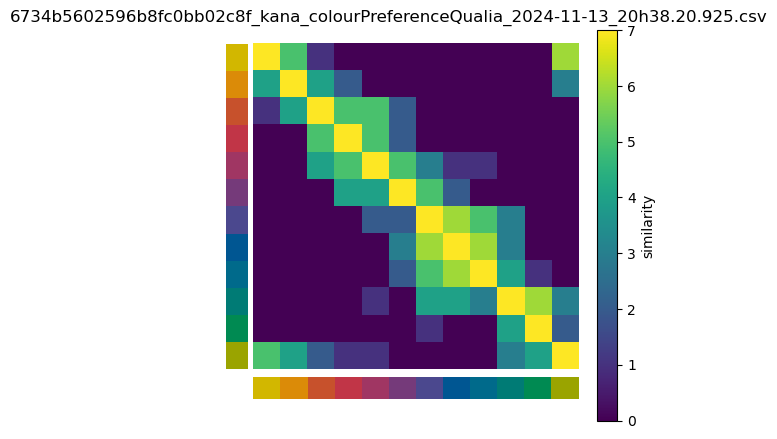

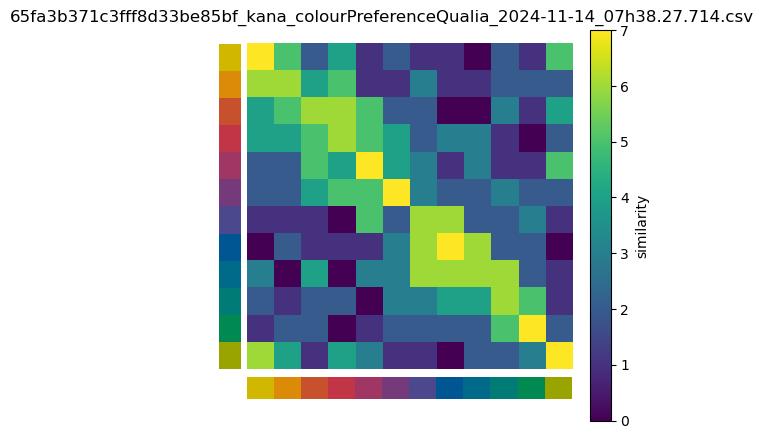

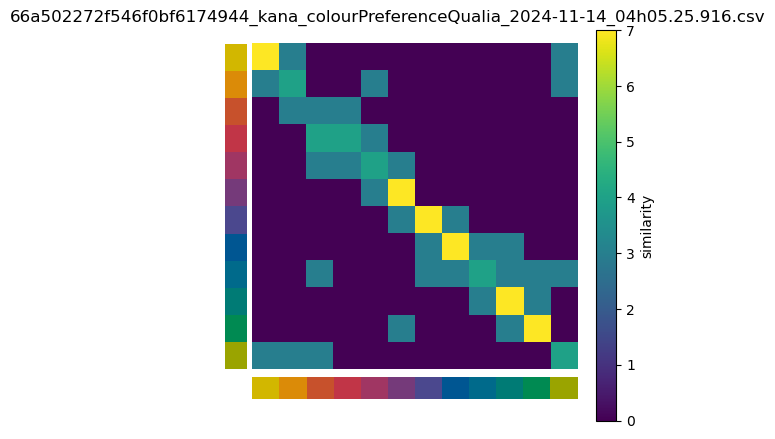

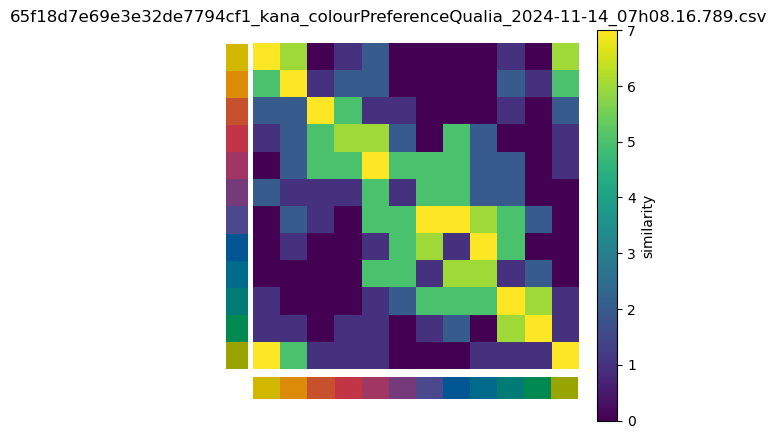

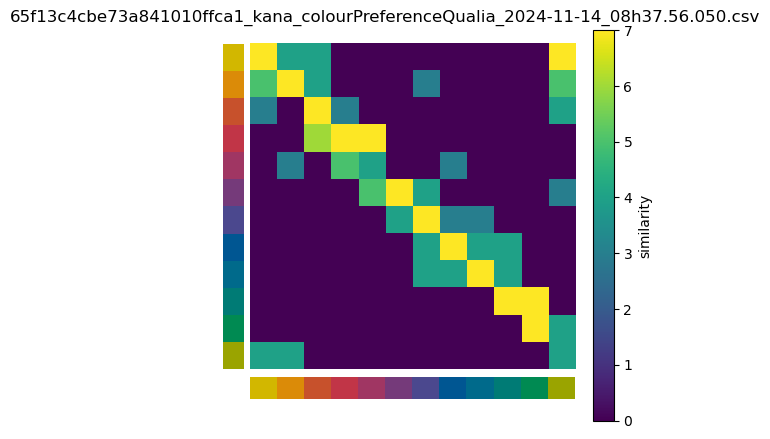

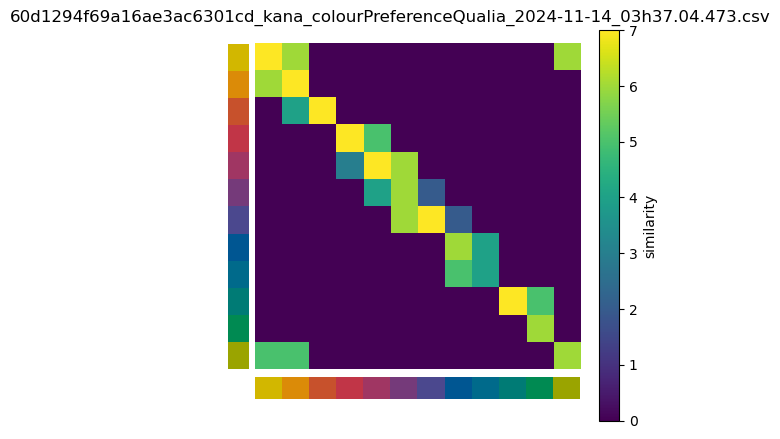

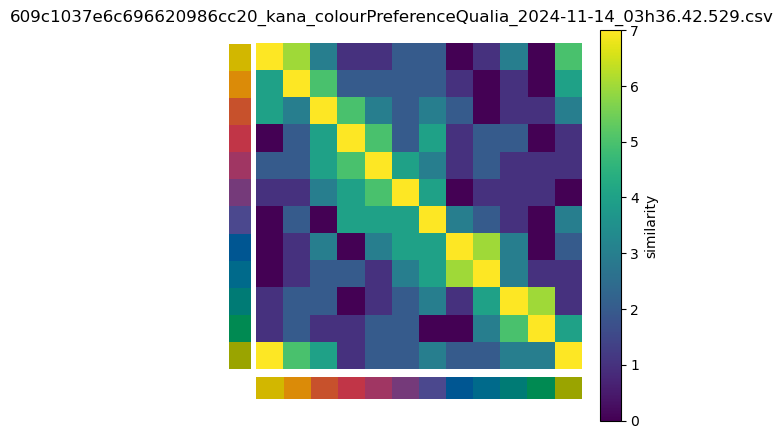

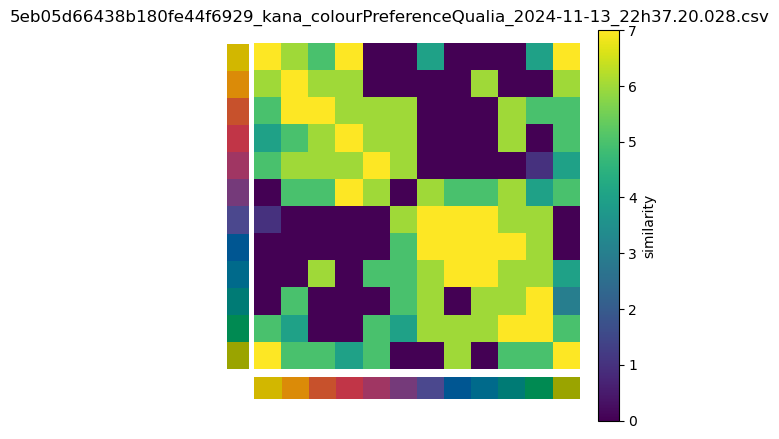

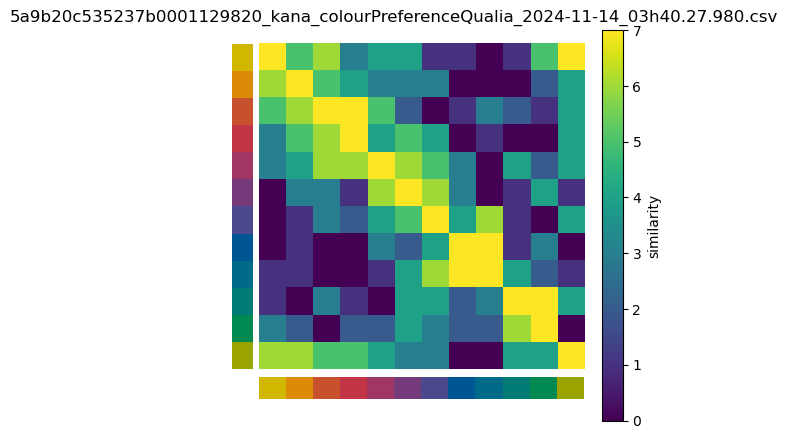

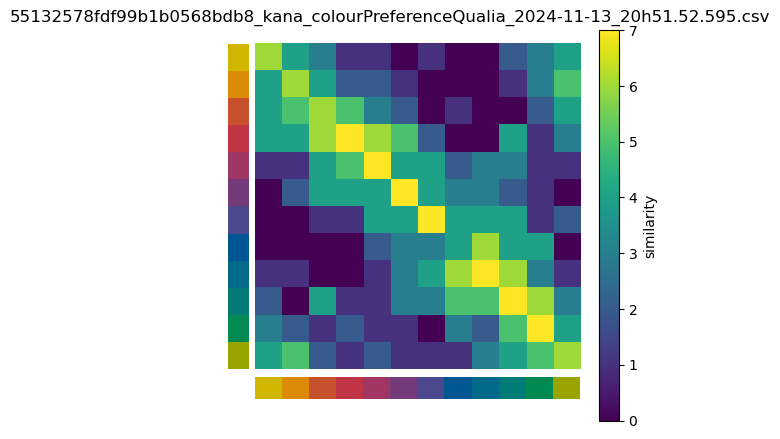

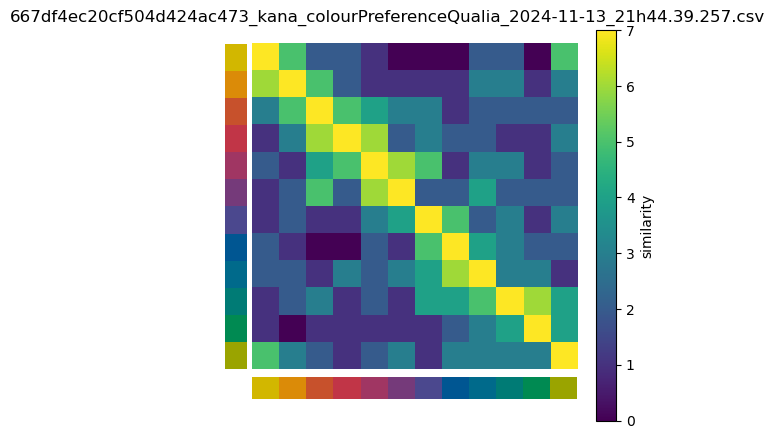

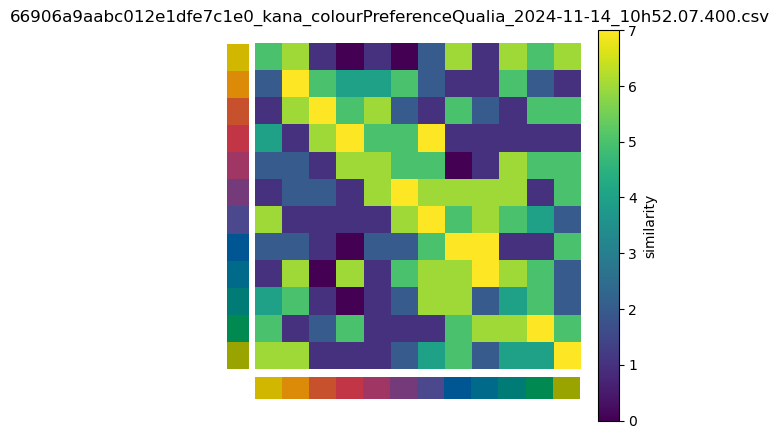

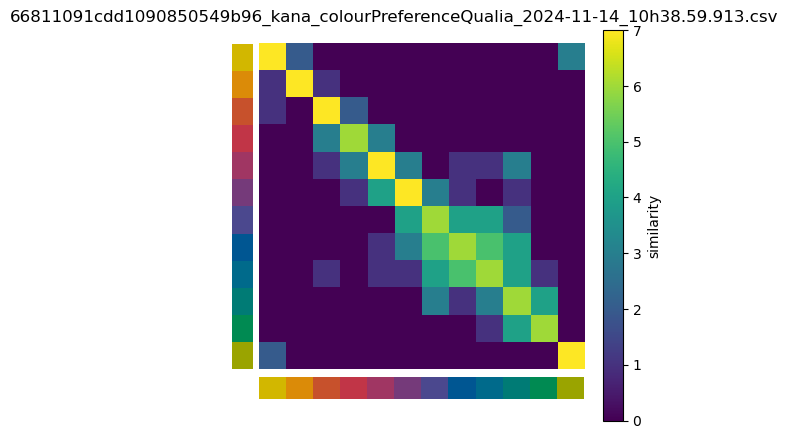

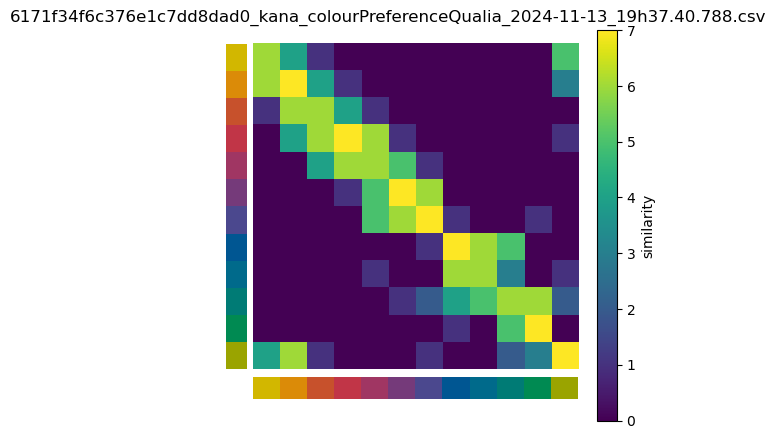

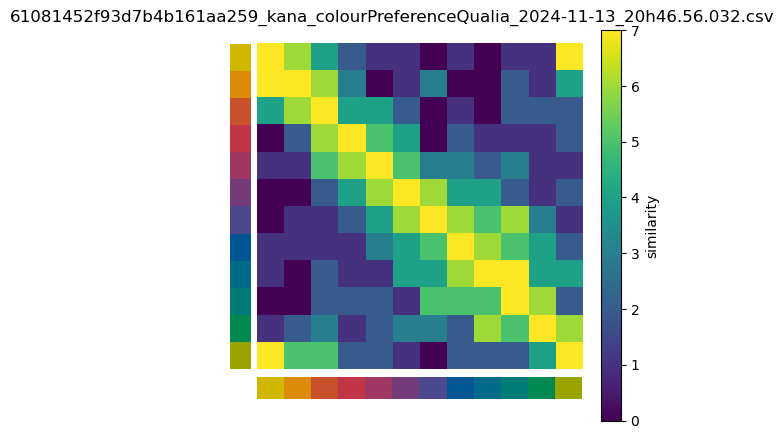

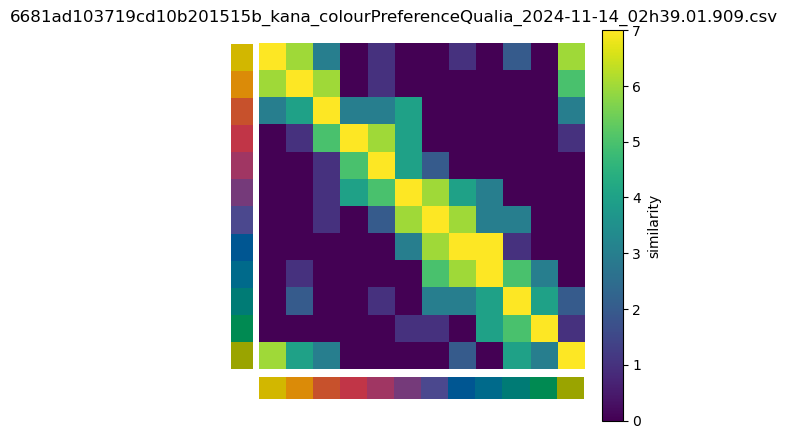

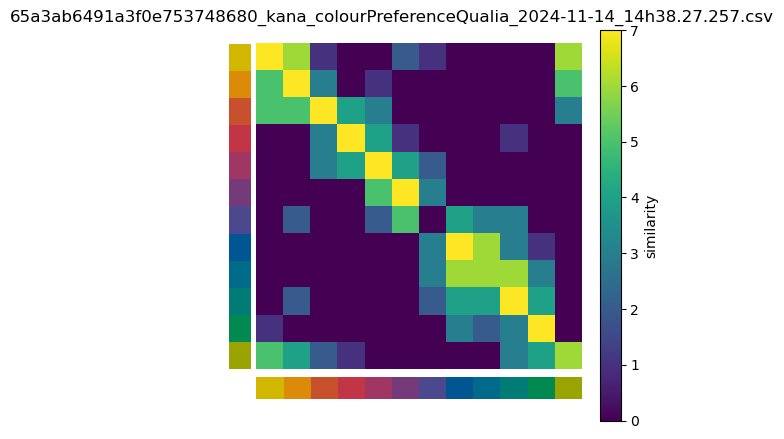

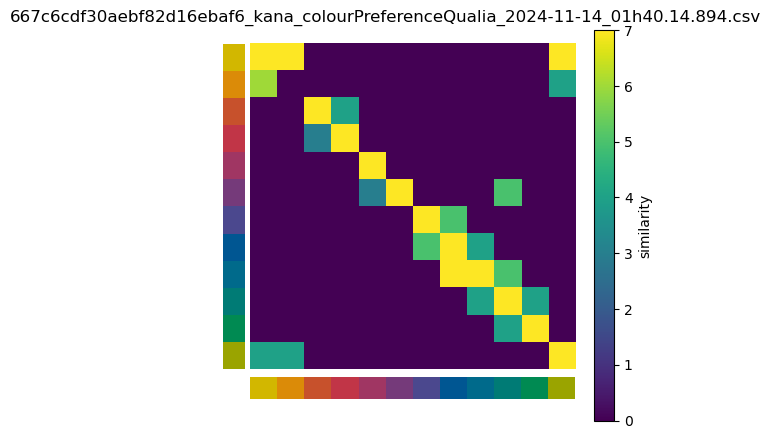

In [18]:
for filename in os.listdir('raw_data/kana_colourpreferencequalia-master/data'):
    if filename.endswith(".csv"):
        filepath = os.path.join('raw_data/kana_colourpreferencequalia-master/data', filename)
        
        # Load the CSV file
        df = pd.read_csv(filepath)

        # Filter for rows where 'response_type' is 'similarity'
        df_similarity = df[df['response_type'] == 'similarity']

        # Extract columns
        colour1 = df_similarity['colour1']
        colour2 = df_similarity['colour2']
        target_preference = df_similarity['response']

        # Create and fill the matrix
        matrix_size = len(colour_index)
        matrix = np.zeros((matrix_size, matrix_size))
        for c1, c2, tp in zip(colour1, colour2, target_preference):
            I = colour_index[c1]
            j = colour_index[c2]
            matrix[j, I] = tp

        # Plot the heatmap for this file
        show_heatmap(matrix, filename, cbar_label="similarity", color_labels=unique_colours)

In [42]:
folder_path = 'raw_data/kana_colourpreferencequalia-master/data'

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        
        df = pd.read_csv(filepath, usecols=['response_type', 'response', 'colour1', 'colour2', 'trials.thisIndex', 'practice_trial'])

        # Omit practice trials
        df = df[df['practice_trial'] != 1]  

        df_similarity = df[df['response_type'] == 'similarity']

        # Group by 'trials.thisIndex'
        grouped = df_similarity.groupby('trials.thisIndex')['response'].apply(list).reset_index()

        # Filter for pairs with exactly two trials
        repeated_pairs = grouped[grouped['response'].apply(len) == 2]

        # Check if there are any repeated pairs
        if len(repeated_pairs) > 0:
            # Flatten the responses for repeated pairs
            responses_trial1 = np.array(repeated_pairs['response'].apply(lambda x: x[0]).tolist())
            responses_trial2 = np.array(repeated_pairs['response'].apply(lambda x: x[1]).tolist())

            # Calculate overall correlation for repeated color pairs
            overall_correlation = pearsonr(responses_trial1, responses_trial2)[0]

            print(f"Overall Pearson Correlation for {filename}: {overall_correlation}")
        else:
            print(f"No repeated pairs found in {filename}")

Overall Pearson Correlation for 663180c01a17f4c911d012ac_kana_colourPreferenceQualia_2024-11-13_20h38.25.064.csv: 0.9539037978413332
Overall Pearson Correlation for 6734b5602596b8fc0bb02c8f_kana_colourPreferenceQualia_2024-11-13_20h38.20.925.csv: 0.923069782854075
Overall Pearson Correlation for 65fa3b371c3fff8d33be85bf_kana_colourPreferenceQualia_2024-11-14_07h38.27.714.csv: 0.7610153645142377
Overall Pearson Correlation for 66a502272f546f0bf6174944_kana_colourPreferenceQualia_2024-11-14_04h05.25.916.csv: 0.6335525936249407
Overall Pearson Correlation for 65f18d7e69e3e32de7794cf1_kana_colourPreferenceQualia_2024-11-14_07h08.16.789.csv: 0.7280800135701446
Overall Pearson Correlation for 65f13c4cbe73a841010ffca1_kana_colourPreferenceQualia_2024-11-14_08h37.56.050.csv: 0.5296629148861249
Overall Pearson Correlation for 60d1294f69a16ae3ac6301cd_kana_colourPreferenceQualia_2024-11-14_03h37.04.473.csv: 0.9402983133076948
Overall Pearson Correlation for 609c1037e6c696620986cc20_kana_colourPr

# Value Mapping to -3.5 ~ 3.5 - raw matrix

In [162]:
# Apply the transformation rule to the entire matrix
value_mapped_raw_1 = np.vectorize(transform_value)(matrix_1)

# Set the diagonal elements to zero
np.fill_diagonal(value_mapped_raw_1, 0)

# Convert to DataFrame for better readability
value_mapped_raw_1_df = pd.DataFrame(value_mapped_raw_1, index=unique_colours, columns=unique_colours)

In [163]:
# Apply the transformation rule to the entire matrix
value_mapped_raw_2 = np.vectorize(transform_value)(matrix_2)

# Set the diagonal elements to zero
np.fill_diagonal(value_mapped_raw_2, 0)

# Convert to DataFrame for better readability
value_mapped_raw_2_df = pd.DataFrame(value_mapped_raw_2, index=unique_colours, columns=unique_colours)

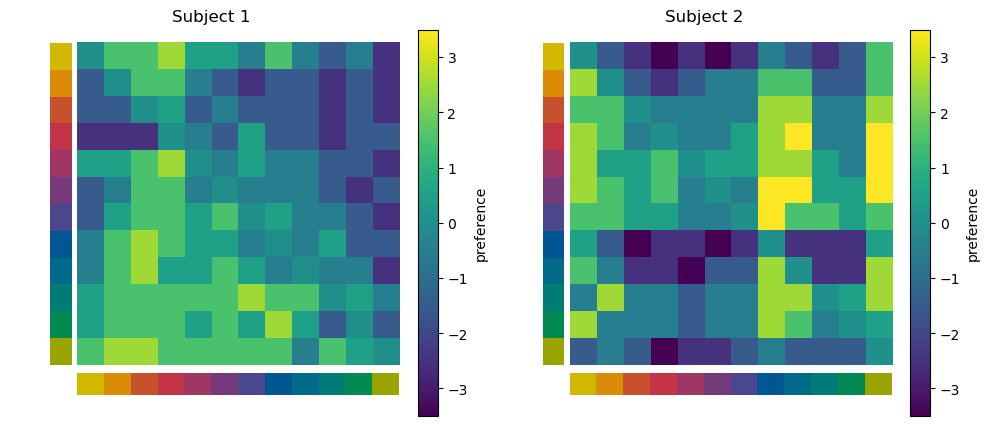

In [164]:
show_heatmaps(-3.5, 3.5, matrices=[value_mapped_raw_1, value_mapped_raw_2], titles=['Subject 1', 'Subject 2'], cbar_label="preference", color_labels=unique_colours)

# Value Mapping - symmetric

In [165]:
# Get the size of the matrix (assume it's square)
n = matrix_1.shape[0]

# Create an empty matrix to store the symmetrical version
value_mapped_sym_1 = np.zeros_like(matrix_1)

# Loop through the upper triangle and the diagonal of the matrix
for i in range(n):
    for j in range(i, n):
        # Compute the average of the symmetric cells (i,j) and (j,i)
        avg_value = (abs(value_mapped_raw_1[i, j]) + abs(value_mapped_raw_1[j, i])) / 2.0
        # Assign the average to both (i,j) and (j,i) in the new symmetrical matrix
        value_mapped_sym_1[i, j] = avg_value
        value_mapped_sym_1[j, i] = avg_value

# Set all diagonal elements to zero
np.fill_diagonal(value_mapped_sym_1, 0)

# Convert to DataFrame for better readability
value_mapped_sym_1_df = pd.DataFrame(value_mapped_sym_1, index=unique_colours, columns=unique_colours)

In [166]:
# Get the size of the matrix (assume it's square)
n = matrix_2.shape[0]

# Create an empty matrix to store the symmetrical version
value_mapped_sym_2 = np.zeros_like(matrix_2)

# Loop through the upper triangle and the diagonal of the matrix
for i in range(n):
    for j in range(i, n):
        # Compute the average of the symmetric cells (i,j) and (j,i)
        avg_value = (abs(value_mapped_raw_2[i, j]) + abs(value_mapped_raw_2[j, i])) / 2.0
        # Assign the average to both (i,j) and (j,i) in the new symmetrical matrix
        value_mapped_sym_2[i, j] = avg_value
        value_mapped_sym_2[j, i] = avg_value

# Set all diagonal elements to zero
np.fill_diagonal(value_mapped_sym_2, 0)

# Convert to DataFrame for better readability
value_mapped_sym_1_df = pd.DataFrame(value_mapped_sym_2, index=unique_colours, columns=unique_colours)

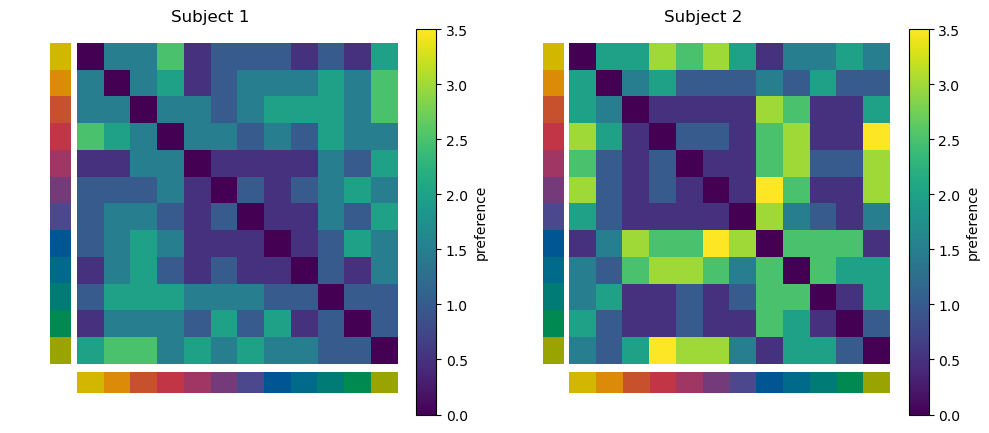

In [167]:
show_heatmaps( 0, 3.5, matrices=[value_mapped_sym_1, value_mapped_sym_2], titles=['Subject 1', 'Subject 2'], cbar_label="preference", color_labels=unique_colours)

# MDS

### 1D MDS and overall preference rating

In [168]:
def plot_1DMDS_overallPreference(matrix_transformed_1, matrix_transformed_2, matrix_transformed_1_as, matrix_transformed_2_as, unique_colours):
    embeddings = []
    for RDM in [matrix_transformed_1, matrix_transformed_2]:
        mds = MDS(n_components=1, dissimilarity='precomputed', random_state=5)
        embedding = mds.fit_transform(RDM)
        embeddings.append(embedding)

    row_averages_1 = matrix_transformed_1_as.mean(axis=0).reshape(-1, 1)
    embeddings_1 = np.hstack((embeddings[0], row_averages_1))

    row_averages_2 = matrix_transformed_2_as.mean(axis=0).reshape(-1, 1)
    embeddings_2 = np.hstack((embeddings[1], row_averages_2))

    embeddings_3 = [embeddings_1, embeddings_2]

    # Plot the embeddings
    plt.figure(figsize=(12, 6))

    # Plot the first embedding
    plt.subplot(1, 2, 1)
    plt.scatter(embeddings_3[0][:, 0], embeddings_3[0][:, 1], color=unique_colours)
    for i, color in enumerate(unique_colours):
        plt.text(embeddings_3[0][i, 0], embeddings_3[0][i, 1], color, fontsize=12, color=color)
    plt.title('MDS Embedding - Subject 1')
    plt.xlabel('MDS Dimension 1', fontsize=14)
    plt.ylabel('Overall Preference value', fontsize=14)

    # Plot the second embedding
    plt.subplot(1, 2, 2)
    plt.scatter(embeddings_3[1][:, 0], embeddings_3[1][:, 1], color=unique_colours)
    for i, color in enumerate(unique_colours):
        plt.text(embeddings_3[1][i, 0], embeddings_3[1][i, 1], color, fontsize=12, color=color)
    plt.title('MDS Embedding - Subject 2')
    plt.xlabel('MDS Dimension 1', fontsize=14)
    plt.ylabel('Overall Preference value', fontsize=14)

    plt.tight_layout()
    plt.show()

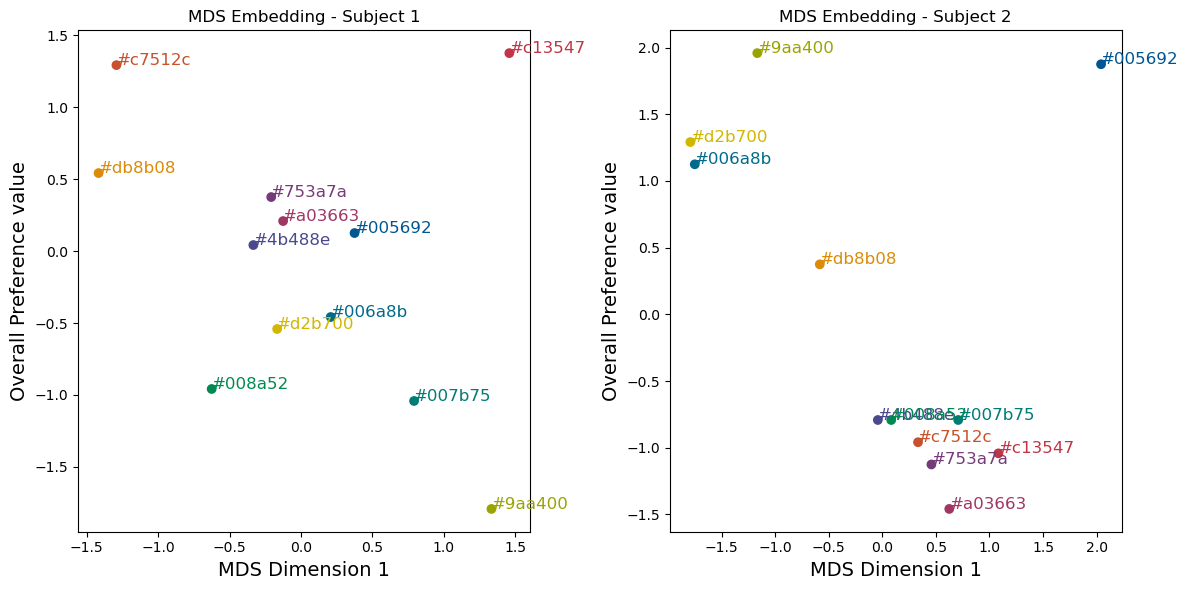

In [169]:
plot_1DMDS_overallPreference(value_mapped_sym_1, value_mapped_sym_2, value_mapped_raw_1, value_mapped_raw_2, unique_colours)

### 3D MDS

In [170]:
def plot_3D_embeddings(embeddings, titles, color_labels, overlay=False):

    if overlay:
        fig = go.Figure()
        for i, embedding in enumerate(embeddings):
            fig.add_trace(go.Scatter3d(
                x=embedding[:, 0],
                y=embedding[:, 1],
                z=embedding[:, 2],
                mode='markers+text',
                marker=dict(size=10, color=color_labels),
                text=color_labels,
                textposition="top center",
                name=titles[i]
            ))
        fig.update_layout(
            title='Overlayed MDS Embeddings',
            scene=dict(
                xaxis_title='Dimension 1',
                yaxis_title='Dimension 2',
                zaxis_title='Dimension 3'
            ),
            height=800,
            plot_bgcolor='white'
        )
        fig.show()
    else:
        for i, embedding in enumerate(embeddings):
            fig = go.Figure()
            fig.add_trace(go.Scatter3d(
                x=embedding[:, 0],
                y=embedding[:, 1],
                z=embedding[:, 2],
                mode='markers+text',
                marker=dict(size=10, color=color_labels),
                text=color_labels,
                textposition="top center"
            ))
            fig.update_layout(
                title=f'MDS Embedding - {titles[i]}',
                scene=dict(
                    xaxis_title='Dimension 1',
                    yaxis_title='Dimension 2',
                    zaxis_title='Dimension 3'
                ),
                height=800,
                plot_bgcolor='white'
            )
            fig.show()


def plot_3DMDS(matrix_transformed_1, matrix_transformed_2, titles, color_labels, overlay=False):
    # Compute MDS for each transformed matrix
    embeddings = []
    for RDM in [matrix_transformed_1, matrix_transformed_2]:
        mds = MDS(n_components=3, dissimilarity='precomputed', random_state=5)
        embedding = mds.fit_transform(RDM)
        embeddings.append(embedding)

    plot_3D_embeddings(embeddings, titles, color_labels, overlay=False)

In [171]:
# Plot the embeddings
plot_3DMDS(value_mapped_sym_1, value_mapped_sym_2, titles=['Subject 1', 'Subject 2'], color_labels=unique_colours, overlay=False)

### 2D MDS

In [172]:
def plot_2DMDS(matrix_transformed_1, matrix_transformed_2):
    # List to store the embeddings
    embeddings = []

    # Compute MDS for each transformed matrix
    for RDM in [matrix_transformed_1, matrix_transformed_2]:
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=5)
        embedding = mds.fit_transform(RDM)
        embeddings.append(embedding)

    # Define unique colors
    unique_colours = np.array(["#d2b700", "#db8b08", "#c7512c", "#c13547", "#a03663", "#753a7a", "#4b488e", "#005692", "#006a8b", "#007b75", "#008a52", "#9aa400"])

    # Plot the embeddings
    plt.figure(figsize=(12, 6))

    # Plot the first embedding
    plt.subplot(1, 2, 1)
    plt.scatter(embeddings[0][:, 0], embeddings[0][:, 1], color=unique_colours)
    for i, color in enumerate(unique_colours):
        plt.text(embeddings[0][i, 0], embeddings[0][i, 1], color, fontsize=12, color=color)
    plt.title('MDS Embedding - Subject 1')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Plot the second embedding
    plt.subplot(1, 2, 2)
    plt.scatter(embeddings[1][:, 0], embeddings[1][:, 1], color=unique_colours)
    for i, color in enumerate(unique_colours):
        plt.text(embeddings[1][i, 0], embeddings[1][i, 1], color, fontsize=12, color=color)
    plt.title('MDS Embedding - Subject 2')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    plt.tight_layout()
    plt.show()

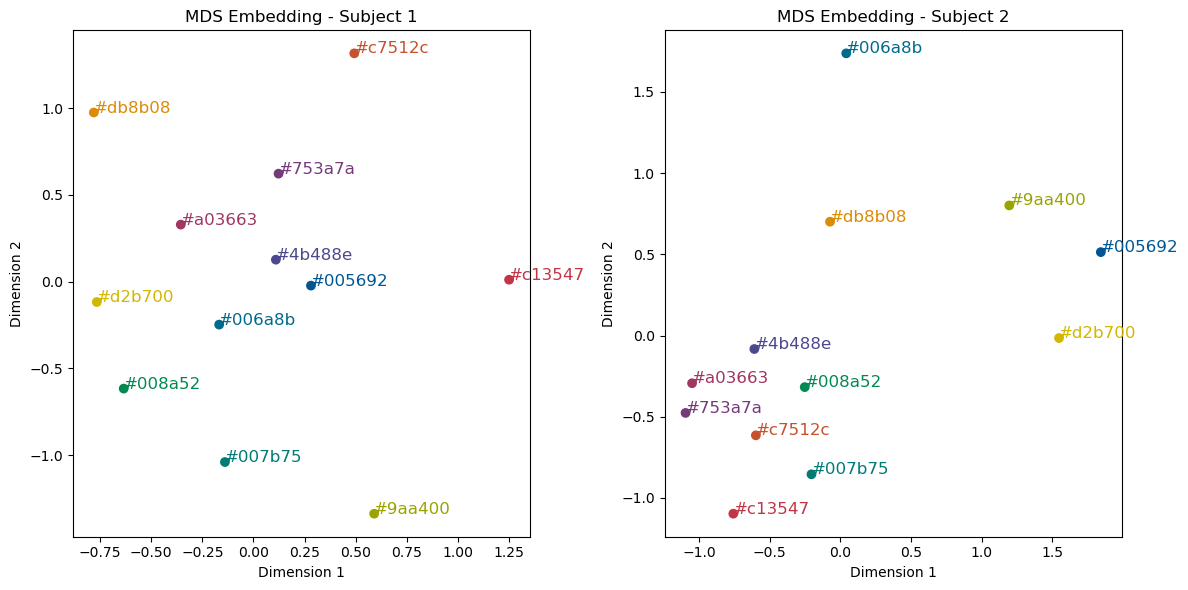

In [173]:
plot_2DMDS(value_mapped_sym_1, value_mapped_sym_2)

### 3D MDS with preference as the z-axis

In [174]:
def plot_3DMDS_overallPreference(matrix_transformed_1, matrix_transformed_2, matrix_transformed_1_as, matrix_transformed_2_as, unique_colours):
    # List to store the embeddings
    embeddings = []

    # First matrix
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=5)
    embedding_2d = mds.fit_transform(matrix_transformed_1)

    # Calculate the average value for each column
    row_averages_1 = matrix_transformed_1_as.mean(axis=0).reshape(-1, 1)

    # Add the row averages as the third dimension
    embedding_3d = np.hstack((embedding_2d, row_averages_1))
    embeddings.append(embedding_3d)

    # Second matrix
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=5)
    embedding_2d = mds.fit_transform(matrix_transformed_2)

    # Calculate the average value for each row
    row_averages_2 = matrix_transformed_2_as.mean(axis=0).reshape(-1, 1)

    # Add the row averages as the third dimension
    embedding_3d = np.hstack((embedding_2d, row_averages_2))
    embeddings.append(embedding_3d)

    plot_3D_embeddings(embeddings, titles=['Subject 1', 'Subject 2'], color_labels=unique_colours, overlay=False)

In [175]:
plot_3DMDS_overallPreference(value_mapped_sym_1, value_mapped_sym_2, value_mapped_raw_1, value_mapped_raw_2, unique_colours)

# GWOT

### GWOT with symmetric matrix (preference distance)

RSA correlation coefficient :  -0.06009121106769349


/opt/anaconda3/envs/colorpreferencequalia/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning:

Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.



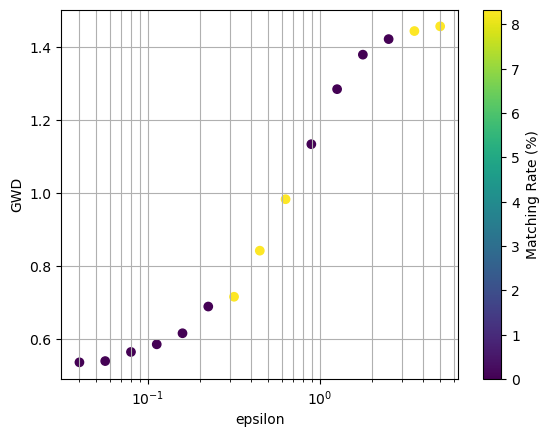

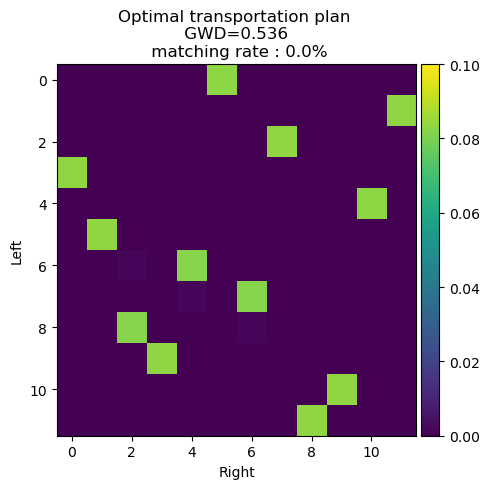

In [176]:
RSA_corr = RSA(value_mapped_sym_1, value_mapped_sym_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_sym, gwds_sym, matching_rates_sym = GWD_and_plot(value_mapped_sym_1, value_mapped_sym_2, epsilons)

In [177]:
embeddings = []
for RDM in [value_mapped_sym_1, value_mapped_sym_2]:
    mds = MDS(n_components=3, dissimilarity='precomputed', random_state=5)
    embedding = mds.fit_transform(RDM)
    embeddings.append(embedding)

embeddings_y = embeddings[1]
# barycentric projection of embedding2 to the space of embedding1
projected_embeddings_x = OT_plan_sym @ embeddings_y * len(OT_plan_sym)

plot_3D_embeddings(
    embeddings=[embeddings_y, projected_embeddings_x],
    titles=['Subject 1', 'Subject 2'],
    overlay=False,
    color_labels=unique_colours)

In [178]:
projected_embeddings_x

array([[ 0.16422514, -0.49382098, -1.0530456 ],
       [ 0.4535742 ,  0.33911254,  1.36249675],
       [ 0.05793994,  1.03307087,  1.59465017],
       [-0.66504968,  0.75599356,  1.18094877],
       [-0.01716727, -0.04517304, -0.39558258],
       [ 0.42630791, -0.43266724,  0.44557358],
       [ 0.56299409, -0.08997941, -0.9612667 ],
       [ 0.13451509, -0.38325121, -0.50260155],
       [ 0.03819068, -0.02250521, -0.84864017],
       [-0.2037779 ,  0.14904579, -1.29540517],
       [-0.34822306,  0.27245259, -0.7287655 ],
       [-0.60371419, -1.08223224,  1.201787  ]])

### GWOT with asymmetric matrix (preference ratings)

RSA correlation coefficient :  -0.3970177769528424


/opt/anaconda3/envs/colorpreferencequalia/lib/python3.12/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning:

Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.



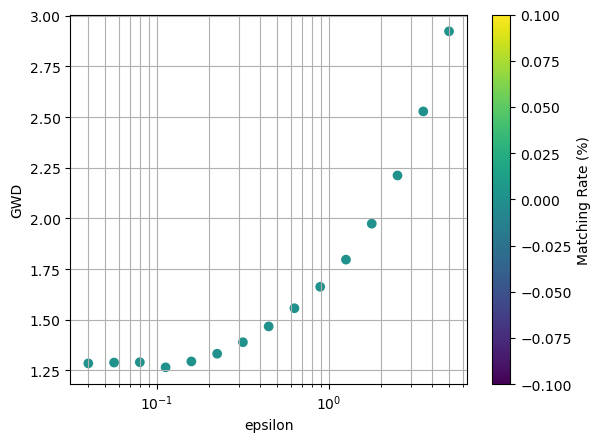

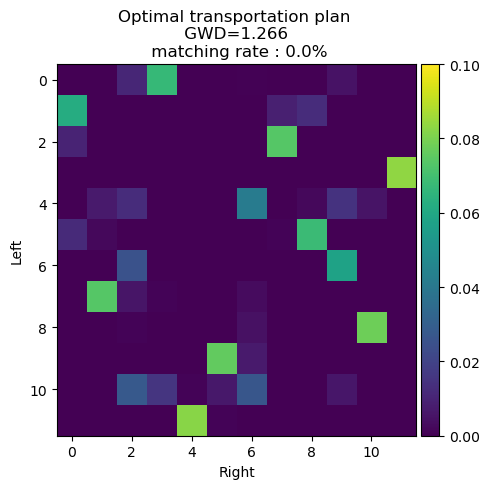

In [179]:
RSA_corr = RSA(value_mapped_raw_1, value_mapped_raw_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_as, gwds_as, matching_rates_as = GWD_and_plot(value_mapped_raw_1, value_mapped_raw_2, epsilons)

### GWOT with random matrix - triangular based

#### Kana

In [180]:
value_mapped_as_shuffledByDiagonal_1 = shuffle_upper_and_lower_triangular(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  -0.18606870229007647


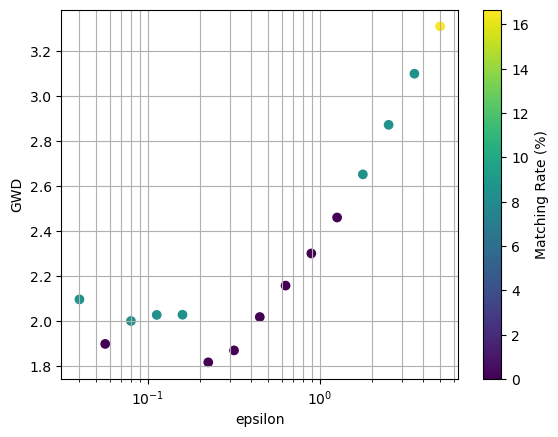

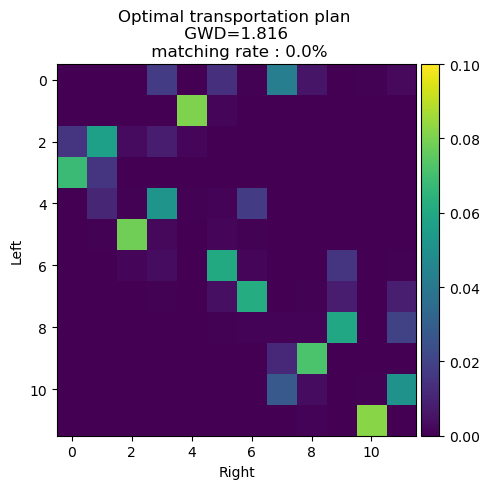

In [181]:
RSA_corr = RSA(value_mapped_raw_1, value_mapped_as_shuffledByDiagonal_1)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledDiagonal_1, gwds_withShuffledDiagonal_1, matching_rates_withShuffledDiagonal_1 = GWD_and_plot(value_mapped_raw_1, value_mapped_as_shuffledByDiagonal_1, epsilons)

#### Angus

In [182]:
value_mapped_as_shuffledByDiagonal_2 = shuffle_upper_and_lower_triangular(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  -0.0734218686011817


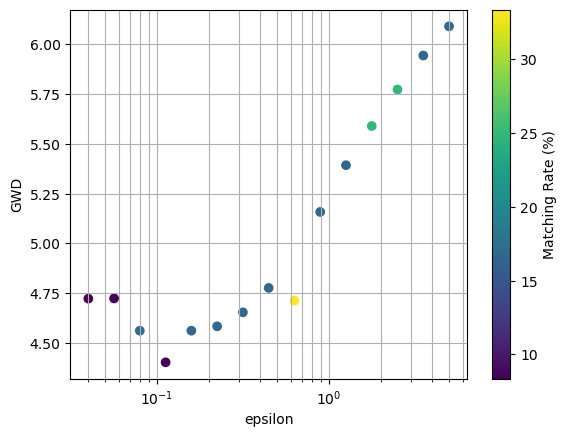

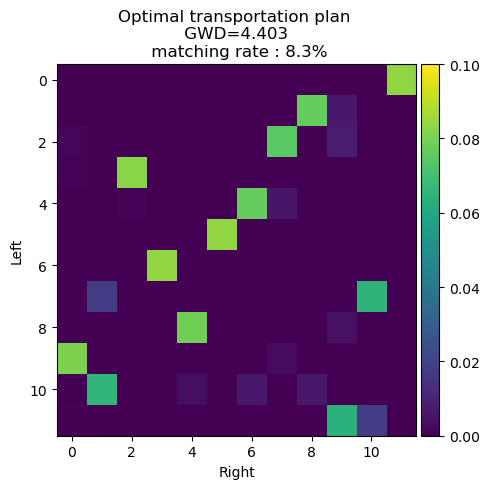

In [183]:
RSA_corr = RSA(value_mapped_raw_2, value_mapped_as_shuffledByDiagonal_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledDiagonal_2, gwds_withShuffledDiagonal_2, matching_rates_withShuffledDiagonal_2 = GWD_and_plot(value_mapped_raw_2, value_mapped_as_shuffledByDiagonal_2, epsilons)

### GWOT with random matrix - column based

#### Kana

In [184]:
value_mapped_as_shuffledByColumn_1 = shuffle_column_and_asymmetritisize(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  0.4931703344029102


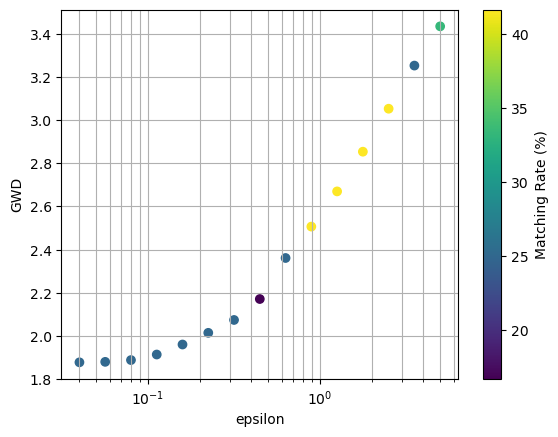

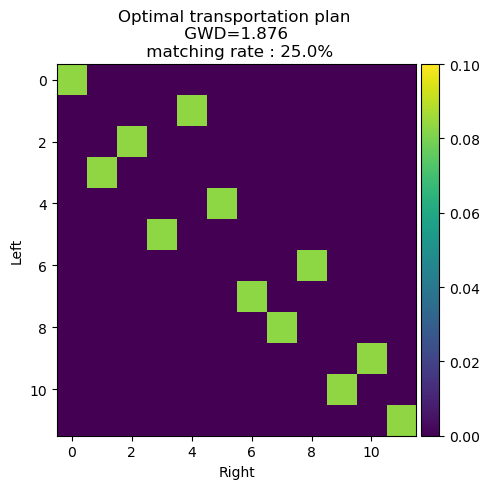

In [185]:
RSA_corr = RSA(value_mapped_raw_1, value_mapped_as_shuffledByColumn_1)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledColumn_1, gwds_withShuffledColumn_1, matching_rates_withShuffledColumn_1 = GWD_and_plot(value_mapped_raw_1, value_mapped_as_shuffledByColumn_1, epsilons)

#### Angus

In [186]:
value_mapped_as_shuffledByColumn_2 = shuffle_column_and_asymmetritisize(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  0.4461093554892964


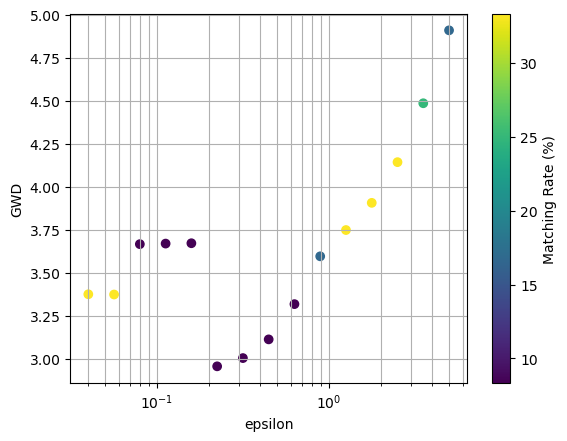

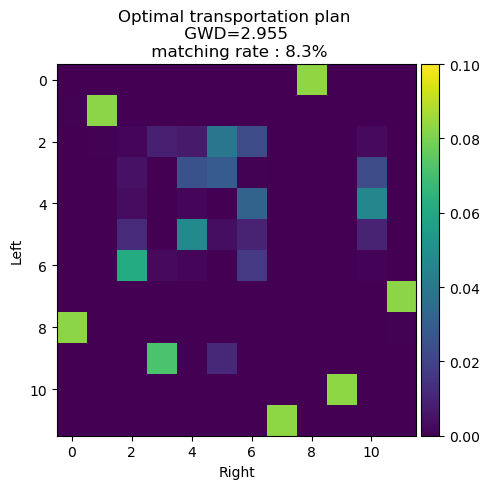

In [187]:
RSA_corr = RSA(value_mapped_raw_2, value_mapped_as_shuffledByColumn_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledColumn_2, gwds_withShuffledColumn_2, matching_rates_withShuffledColumn_2 = GWD_and_plot(value_mapped_raw_2, value_mapped_as_shuffledByColumn_2, epsilons)

### GWOT with random matrix - row based

#### Subject 1

In [188]:
value_mapped_as_shuffledByRow_1 = shuffle_row_and_asymmetritisize(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  0.10383897093031508


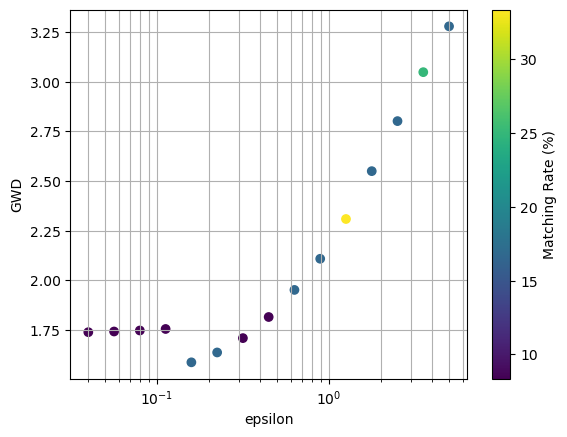

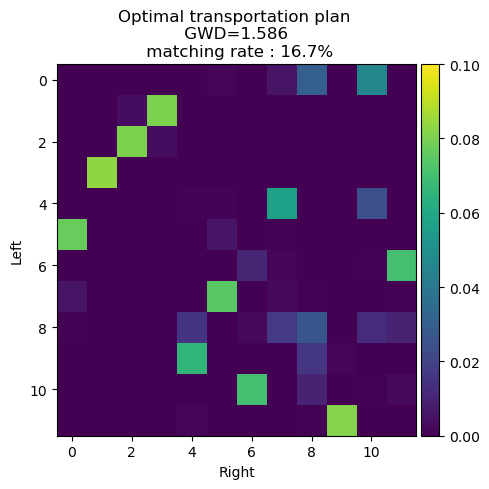

In [189]:
RSA_corr = RSA(value_mapped_raw_1, value_mapped_as_shuffledByRow_1)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledColumn_1, gwds_withShuffledRow_1, matching_rates_withShuffledRow_1 = GWD_and_plot(value_mapped_raw_1, value_mapped_as_shuffledByRow_1, epsilons)

#### Subject 2

In [190]:
value_mapped_as_shuffledByRow_2 = shuffle_row_and_asymmetritisize(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  0.3176007691021943


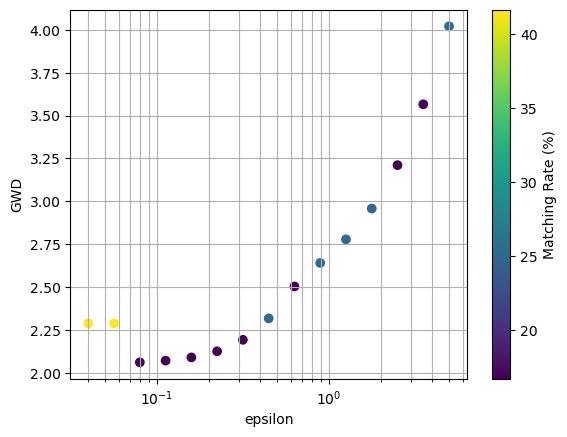

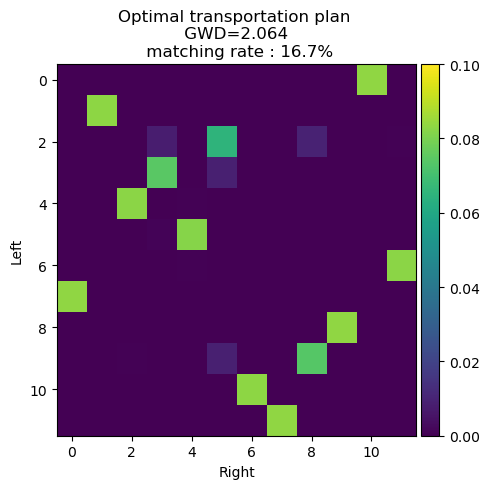

In [191]:
RSA_corr = RSA(value_mapped_raw_2, value_mapped_as_shuffledByRow_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_withShuffledColumn_2, gwds_withShuffledRow_2, matching_rates_withShuffledRow_2 = GWD_and_plot(value_mapped_raw_2, value_mapped_as_shuffledByRow_2, epsilons)

### GWOT with random matrix - shuffled and shuffled (diagonal based)

#### Kana

In [192]:
value_mapped_as_shuffledByDiagonal_1_1 = shuffle_upper_and_lower_triangular(value_mapped_raw_1, matrix_size)
value_mapped_as_shuffledByDiagonal_1_2 = shuffle_upper_and_lower_triangular(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  -0.15458015267175595


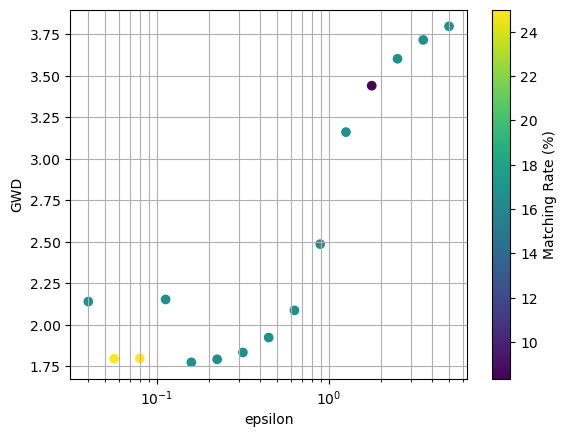

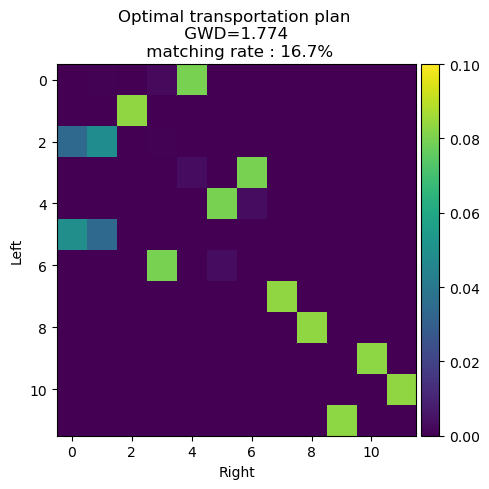

In [193]:
RSA_corr = RSA(value_mapped_as_shuffledByDiagonal_1_1, value_mapped_as_shuffledByDiagonal_1_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledDiagonal_1, gwds_ShuffledwithShuffledDiagonal_1, matching_rates_ShuffledwithShuffledDiagonal_1 = GWD_and_plot(value_mapped_as_shuffledByDiagonal_1_1, value_mapped_as_shuffledByDiagonal_1_2, epsilons)

#### Angus

In [194]:
value_mapped_as_shuffledByDiagonal_2_1 = shuffle_upper_and_lower_triangular(value_mapped_raw_2, matrix_size)
value_mapped_as_shuffledByDiagonal_2_2 = shuffle_upper_and_lower_triangular(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  -0.02322588193997544


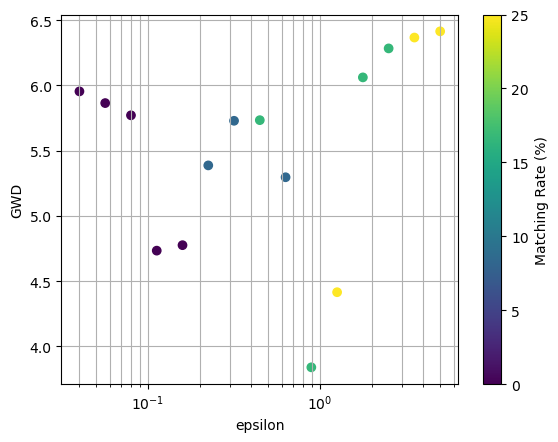

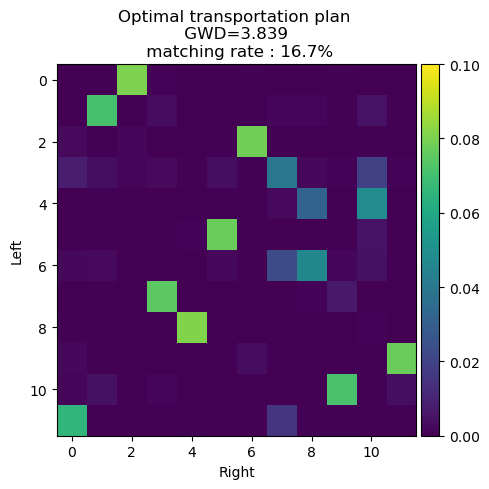

In [195]:
RSA_corr = RSA(value_mapped_as_shuffledByDiagonal_2_1, value_mapped_as_shuffledByDiagonal_2_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledDiagonal_2, gwds_ShuffledwithShuffledDiagonal_2, matching_rates_ShuffledwithShuffledDiagonal_2 = GWD_and_plot(value_mapped_as_shuffledByDiagonal_2_1, value_mapped_as_shuffledByDiagonal_2_2, epsilons)

### GWOT with random matrix - shuffled and shuffled (column based)

#### Kana

In [196]:
value_mapped_as_shuffledByColumn_1_1 = shuffle_column_and_asymmetritisize(value_mapped_raw_1, matrix_size)
value_mapped_as_shuffledByColumn_1_2 = shuffle_column_and_asymmetritisize(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  0.4238179775106491


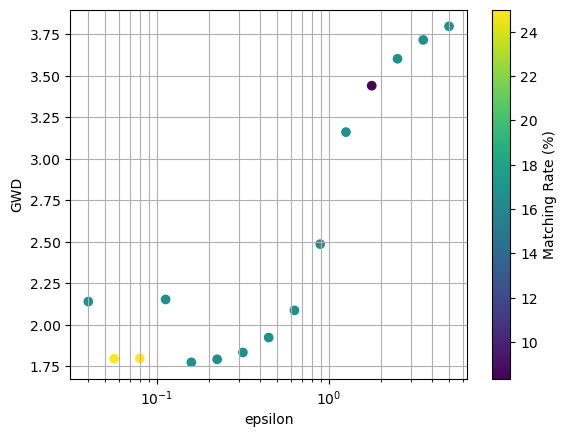

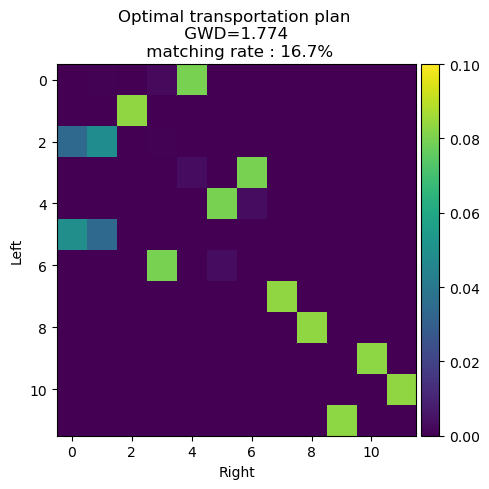

In [197]:
RSA_corr = RSA(value_mapped_as_shuffledByColumn_1_1, value_mapped_as_shuffledByColumn_1_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledColumn_1, gwds_ShuffledwithShuffledColumn_1, matching_rates_ShuffledwithShuffledColumn_1 = GWD_and_plot(value_mapped_as_shuffledByDiagonal_1_1, value_mapped_as_shuffledByDiagonal_1_2, epsilons)

#### Angus

In [198]:
value_mapped_as_shuffledByColumn_2_1 = shuffle_column_and_asymmetritisize(value_mapped_raw_2, matrix_size)
value_mapped_as_shuffledByColumn_2_2 = shuffle_column_and_asymmetritisize(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  0.4724347920754641


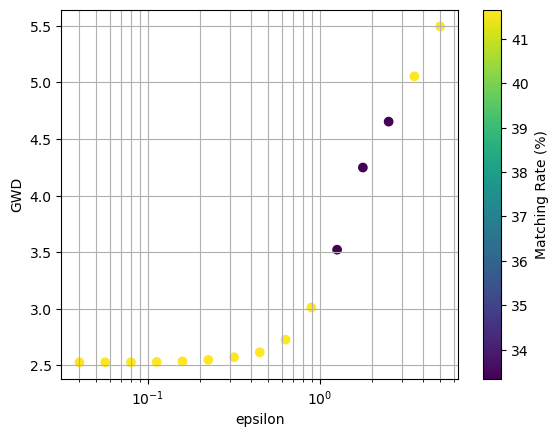

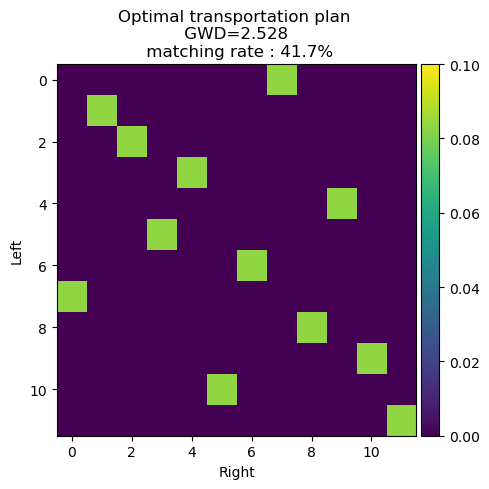

In [199]:
RSA_corr = RSA(value_mapped_as_shuffledByColumn_2_1, value_mapped_as_shuffledByColumn_2_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledColumn_2, gwds_ShuffledwithShuffledColumn_2, matching_rates_ShuffledwithShuffledColumn_2 = GWD_and_plot(value_mapped_as_shuffledByColumn_2_1, value_mapped_as_shuffledByColumn_2_2, epsilons)

### GWOT with random matrix - shuffled and shuffled (row based)

#### Subject 1

In [200]:
value_mapped_as_shuffledByRow_1_1 = shuffle_row_and_asymmetritisize(value_mapped_raw_1, matrix_size)
value_mapped_as_shuffledByRow_1_2 = shuffle_row_and_asymmetritisize(value_mapped_raw_1, matrix_size)

RSA correlation coefficient :  0.3842147764113706


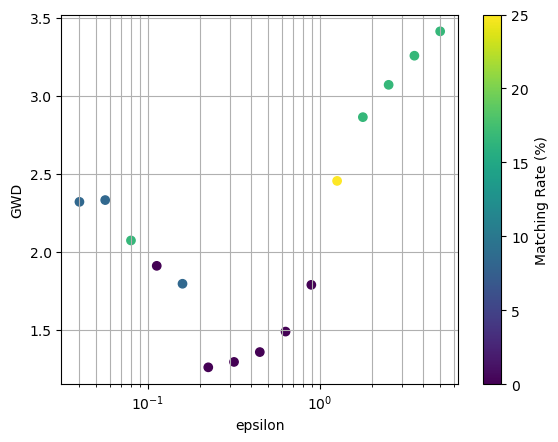

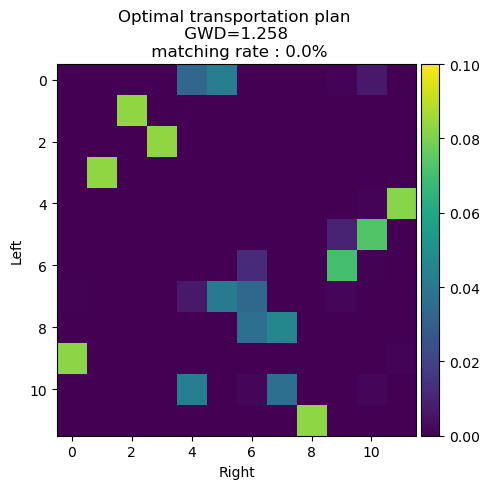

In [201]:
RSA_corr = RSA(value_mapped_as_shuffledByRow_1_1, value_mapped_as_shuffledByRow_1_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledRow_1, gwds_ShuffledwithShuffledRow_1, matching_rates_ShuffledwithShuffledRow_1 = GWD_and_plot(value_mapped_as_shuffledByRow_1_1, value_mapped_as_shuffledByRow_1_2, epsilons)

#### Subject 2

In [202]:
value_mapped_as_shuffledByRow_2_1 = shuffle_row_and_asymmetritisize(value_mapped_raw_2, matrix_size)
value_mapped_as_shuffledByRow_2_2 = shuffle_row_and_asymmetritisize(value_mapped_raw_2, matrix_size)

RSA correlation coefficient :  0.479712409789986


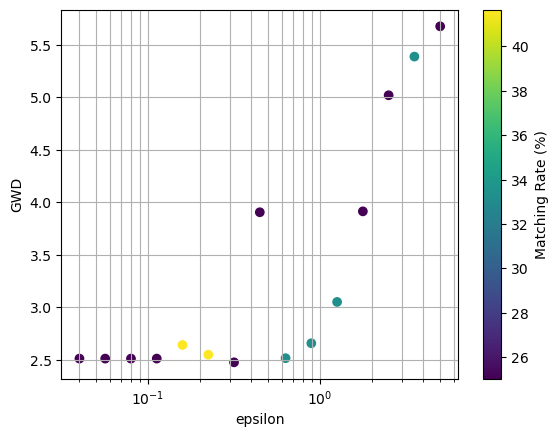

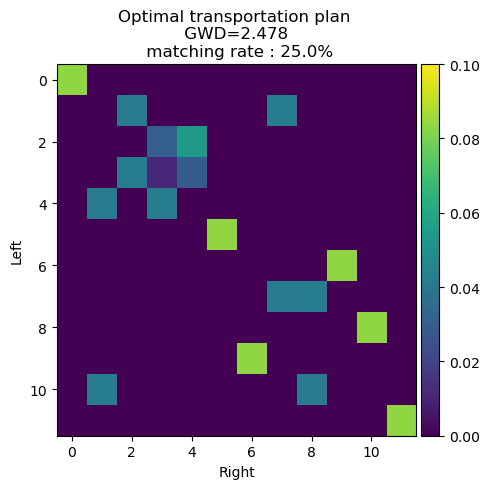

In [203]:
RSA_corr = RSA(value_mapped_as_shuffledByRow_2_1, value_mapped_as_shuffledByRow_2_2)
print('RSA correlation coefficient : ', RSA_corr)
OT_plan_ShuffledwithShuffledRow_2, gwds_ShuffledwithShuffledRow_2, matching_rates_ShuffledwithShuffledRow_2 = GWD_and_plot(value_mapped_as_shuffledByRow_2_1, value_mapped_as_shuffledByRow_2_2, epsilons)